In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Python/Final Test

/content/gdrive/MyDrive/Python/Final Test


In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
!pip install chart-studio
from chart_studio import plotly

     |████████████████████████████████| 64 kB 2.0 MB/s 


In [ ]:
!pip install --upgrade lifetimes==0.10.1
!pip install scikit-learn-extra

     |████████████████████████████████| 581 kB 14.1 MB/s 
     |████████████████████████████████| 1.7 MB 14.8 MB/s 
     |████████████████████████████████| 23.1 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import lifetimes
from datetime import timedelta
from datetime import date
from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from scipy.stats import gamma, beta
from sklearn_extra.cluster import KMedoids
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('transaction_data.csv')

In [ ]:
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Date,Date2,Time,IST,Year,TransactionTime2,TransactionTime2Month
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,Sat,Feb,02,12:50:00,IST,2019,2019-02-02,2019-02
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,Dec,26,09:06:00,IST,2018,2018-12-26,2018-12
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,Feb,15,09:45:00,IST,2019,2019-02-15,2019-02
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,Jun,22,07:14:00,IST,2018,2018-06-22,2018-06
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,Fri,Jan,11,09:50:00,IST,2019,2019-01-11,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083812,261681,6153092,Wed Sep 19 06:23:00 IST 2018,477330,ALARM CLOCK BAKELIKE IVORY,12,5.18,Switzerland,Wed,Sep,19,06:23:00,IST,2018,2018-09-19,2018-09
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE,Mon,Jun,18,09:18:00,IST,2018,2018-06-18,2018-06
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom,Sat,Feb,16,09:14:00,IST,2019,2019-02-16,2019-02
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom,Fri,Mar,23,06:26:00,IST,2018,2018-03-23,2018-03


# **Pre-Processing Data**

In [166]:
df.isna().sum()

UserId                    0
TransactionId             0
TransactionTime           0
ItemCode                  0
ItemDescription           0
NumberOfItemsPurchased    0
CostPerItem               0
Country                   0
Day                       0
Date                      0
Date2                     0
Time                      0
IST                       0
Year                      0
TransactionTime2          0
TransactionTime2Month     0
dtype: int64

In [167]:
df['ItemDescription'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    4140
REGENCY CAKESTAND 3 TIER              3810
JUMBO BAG RED RETROSPOT               3324
ASSORTED COLOUR BIRD ORNAMENT         2836
PARTY BUNTING                         2832
                                      ... 
LETTER "T" BLING KEY RING                2
CRYSTAL CHANDELIER T-LIGHT HOLDER        2
DUSTY PINK CHRISTMAS TREE 30CM           2
SET 36 COLOURING PENCILS DOILEY          2
PINK/WHITE GLASS DEMI CHOKER             2
Name: ItemDescription, Length: 3896, dtype: int64

In [168]:
df['ItemDescription'].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [169]:
df["ItemDescription"].fillna(df["ItemDescription"].mode()[0], inplace=True)

In [170]:
df.isna().sum()

UserId                    0
TransactionId             0
TransactionTime           0
ItemCode                  0
ItemDescription           0
NumberOfItemsPurchased    0
CostPerItem               0
Country                   0
Day                       0
Date                      0
Date2                     0
Time                      0
IST                       0
Year                      0
TransactionTime2          0
TransactionTime2Month     0
dtype: int64

In [171]:


df['ItemDescription'].value_counts().head(5)

WHITE HANGING HEART T-LIGHT HOLDER    4140
REGENCY CAKESTAND 3 TIER              3810
JUMBO BAG RED RETROSPOT               3324
ASSORTED COLOUR BIRD ORNAMENT         2836
PARTY BUNTING                         2832
Name: ItemDescription, dtype: int64

In [172]:
df['ItemDescription'].value_counts(ascending=False)

WHITE HANGING HEART T-LIGHT HOLDER    4140
REGENCY CAKESTAND 3 TIER              3810
JUMBO BAG RED RETROSPOT               3324
ASSORTED COLOUR BIRD ORNAMENT         2836
PARTY BUNTING                         2832
                                      ... 
LETTER "T" BLING KEY RING                2
CRYSTAL CHANDELIER T-LIGHT HOLDER        2
DUSTY PINK CHRISTMAS TREE 30CM           2
SET 36 COLOURING PENCILS DOILEY          2
PINK/WHITE GLASS DEMI CHOKER             2
Name: ItemDescription, Length: 3896, dtype: int64

In [173]:
df['UserId'].nunique()

4372

In [174]:

df.head(5)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Date,Date2,Time,IST,Year,TransactionTime2,TransactionTime2Month
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,Sat,Feb,02,12:50:00,IST,2019,2019-02-02,2019-02
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,Dec,26,09:06:00,IST,2018,2018-12-26,2018-12
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,Feb,15,09:45:00,IST,2019,2019-02-15,2019-02
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,Jun,22,07:14:00,IST,2018,2018-06-22,2018-06
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,Fri,Jan,11,09:50:00,IST,2019,2019-01-11,2019-01


In [175]:
df.groupby('UserId')['TransactionId'].nunique().sort_values(ascending=False).head()

UserId
313131    248
267708    224
374661    169
306726    128
274869    118
Name: TransactionId, dtype: int64

In [176]:
df[df['UserId']==-1].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Date,Date2,Time,IST,Year,TransactionTime2,TransactionTime2Month


In [177]:
delete_row = df[df["UserId"]==-1].index
df = df.drop(delete_row)

In [178]:
df.groupby('UserId')['TransactionId'].nunique().sort_values(ascending=False).head(5)

UserId
313131    248
267708    224
374661    169
306726    128
274869    118
Name: TransactionId, dtype: int64

In [179]:
df.dtypes

UserId                             int64
TransactionId                      int64
TransactionTime                   object
ItemCode                           int64
ItemDescription                   object
NumberOfItemsPurchased             int64
CostPerItem                      float64
Country                           object
Day                               object
Date                              object
Date2                             object
Time                              object
IST                               object
Year                              object
TransactionTime2          datetime64[ns]
TransactionTime2Month             object
dtype: object

In [180]:
df2 = df

In [181]:
new = df2["TransactionTime"].str.split(" ", n = 0, expand = True)
df2["Day"]= new[0]
df2["Date"]= new[1]
df2["Date2"]= new[2]
  
# making separate last name column from new data frame
df2["Time"]= new[3]
df2["IST"]= new[4]
df2["Year"]= new[5]

In [182]:
df2

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Date,Date2,Time,IST,Year,TransactionTime2,TransactionTime2Month
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,Sat,Feb,02,12:50:00,IST,2019,2019-02-02,2019-02
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,Dec,26,09:06:00,IST,2018,2018-12-26,2018-12
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,Feb,15,09:45:00,IST,2019,2019-02-15,2019-02
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,Jun,22,07:14:00,IST,2018,2018-06-22,2018-06
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,Fri,Jan,11,09:50:00,IST,2019,2019-01-11,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083812,261681,6153092,Wed Sep 19 06:23:00 IST 2018,477330,ALARM CLOCK BAKELIKE IVORY,12,5.18,Switzerland,Wed,Sep,19,06:23:00,IST,2018,2018-09-19,2018-09
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE,Mon,Jun,18,09:18:00,IST,2018,2018-06-18,2018-06
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom,Sat,Feb,16,09:14:00,IST,2019,2019-02-16,2019-02
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom,Fri,Mar,23,06:26:00,IST,2018,2018-03-23,2018-03


In [183]:
print("Sebelum di replace: \n", df2['Year'].value_counts())
df2['Year'] = df2['Year'].replace(['2028'], '2018')
print("Setelah di replace: \n", df2['Year'].value_counts())

Sebelum di replace: 
 2018    605502
2019    205890
2028      2266
Name: Year, dtype: int64
Setelah di replace: 
 2018    607768
2019    205890
Name: Year, dtype: int64


In [184]:
df2['TransactionTime2'] = df2['Date'] + '/' + df2['Date2'] + '/' + df2['Year']

In [185]:
df2.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Date,Date2,Time,IST,Year,TransactionTime2,TransactionTime2Month
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,Sat,Feb,02,12:50:00,IST,2019,Feb/02/2019,2019-02
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,Dec,26,09:06:00,IST,2018,Dec/26/2018,2018-12
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,Feb,15,09:45:00,IST,2019,Feb/15/2019,2019-02
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,Jun,22,07:14:00,IST,2018,Jun/22/2018,2018-06
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,Fri,Jan,11,09:50:00,IST,2019,Jan/11/2019,2019-01


In [186]:
df2['TransactionTime2'] = pd.to_datetime(df['TransactionTime2'])
df2['TransactionTime2Month'] = df2['TransactionTime2'].dt.strftime('%Y-%m')

In [187]:
df2.dtypes

UserId                             int64
TransactionId                      int64
TransactionTime                   object
ItemCode                           int64
ItemDescription                   object
NumberOfItemsPurchased             int64
CostPerItem                      float64
Country                           object
Day                               object
Date                              object
Date2                             object
Time                              object
IST                               object
Year                              object
TransactionTime2          datetime64[ns]
TransactionTime2Month             object
dtype: object

In [188]:
df2 = df2.drop(['Date', 'Date2', 'TransactionTime', 'IST', 'Year', 'ItemCode'], axis = 1)

In [189]:
df2.head(5)

,UserId,TransactionId,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Time,TransactionTime2,TransactionTime2Month
0,278166,6355745,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,Sat,12:50:00,2019-02-02,2019-02
1,337701,6283376,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,09:06:00,2018-12-26,2018-12
2,267099,6385599,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,09:45:00,2019-02-15,2019-02
3,380478,6044973,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,07:14:00,2018-06-22,2018-06
5,285957,6307136,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,Fri,09:50:00,2019-01-11,2019-01


In [190]:
df2.describe()

,UserId,TransactionId,NumberOfItemsPurchased,CostPerItem
count,813658.000000,8.136580e+05,813658.000000,8.136580e+05
mean,321041.501975,6.166399e+06,36.183910,8.950375e+00
std,35985.584256,1.441598e+05,746.079652,2.661168e+03
min,259266.000000,5.900015e+06,-242985.000000,0.000000e+00
25%,293013.000000,6.040430e+06,6.000000,1.730000e+00
50%,318192.000000,6.180603e+06,15.000000,2.700000e+00
75%,352611.000000,6.292715e+06,36.000000,5.180000e+00
max,384027.000000,6.397457e+06,242985.000000,1.696285e+06


In [191]:
df2.nunique()

UserId                     4372
TransactionId             22190
ItemDescription            3896
NumberOfItemsPurchased      436
CostPerItem                 621
Country                      37
Day                           6
Time                        773
TransactionTime2            305
TransactionTime2Month        13
dtype: int64

In [192]:
# assign variable for column in numeric type
numeric_column = ['TransactionId','NumberOfItemsPurchased','CostPerItem']

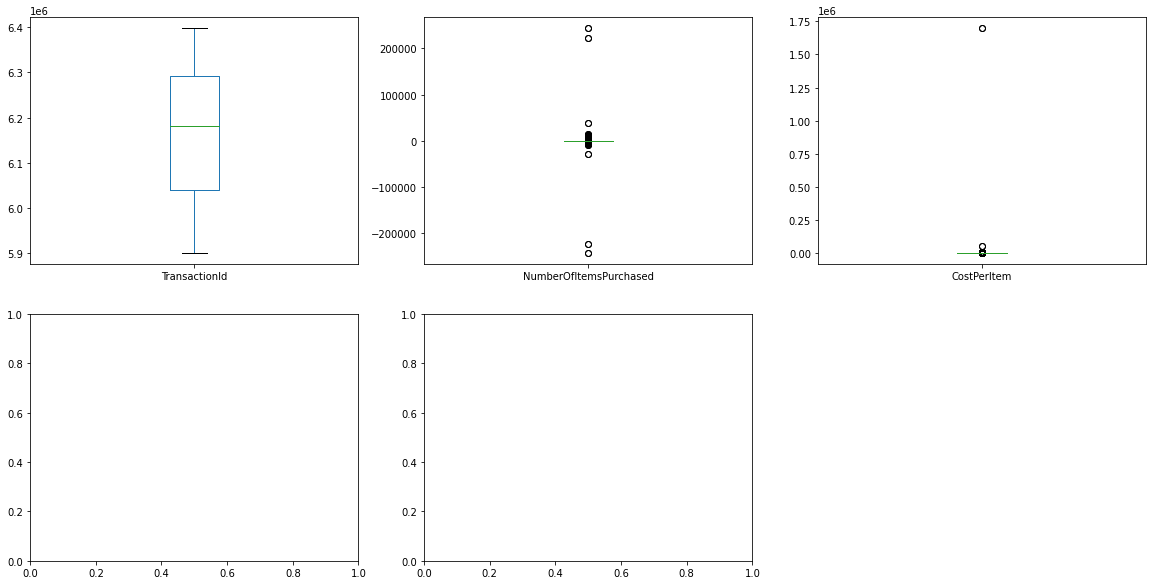

In [193]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

for i,el in enumerate(numeric_column):
    a = df2.boxplot(el, ax=axes.flatten()[i],grid=False)

fig.delaxes(axes[1][2])
plt.show()

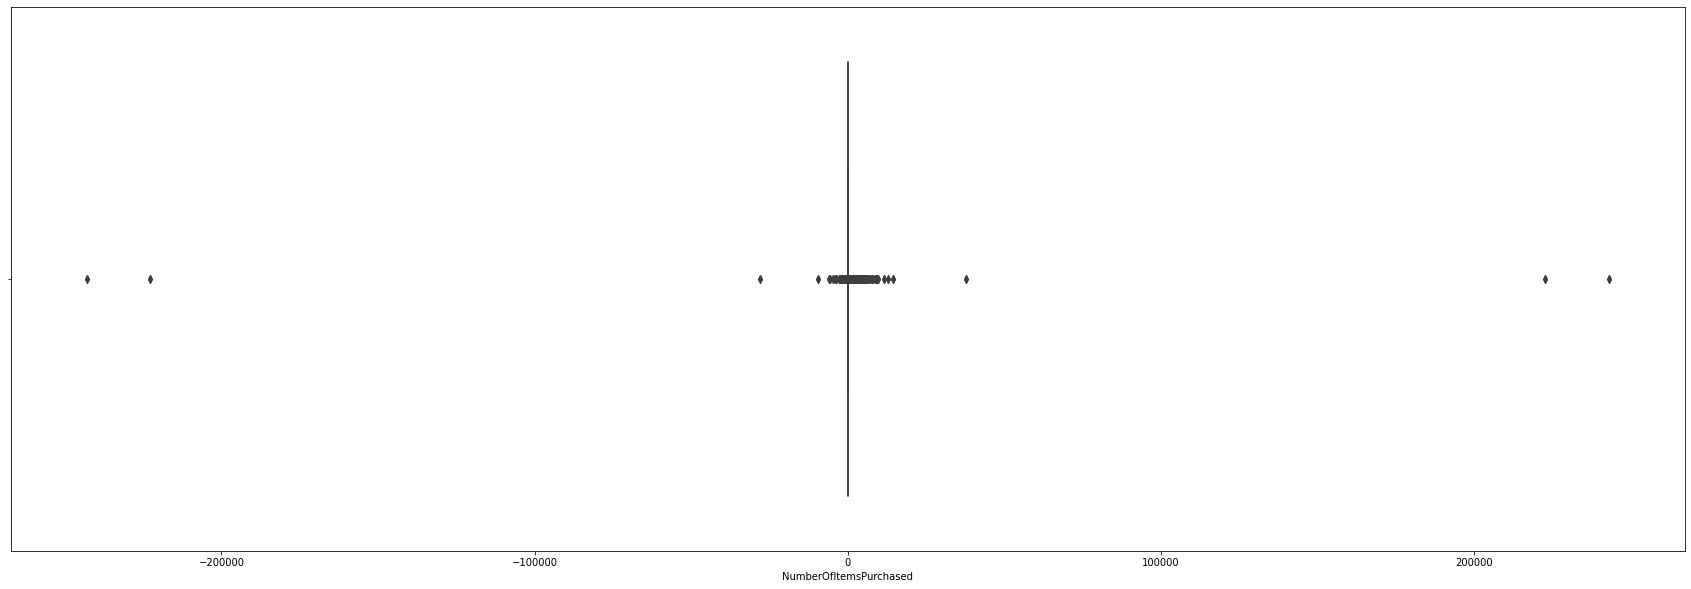

In [194]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df2, x='NumberOfItemsPurchased')

In [195]:
df2.shape

(813658, 10)

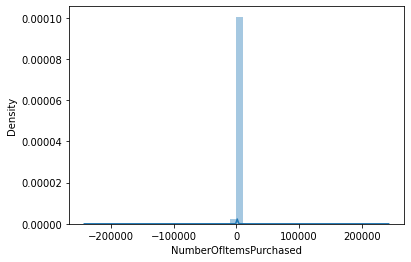

In [196]:
#checking the outlier
sns.distplot(df2['NumberOfItemsPurchased'])

In [197]:

# get IQR for NumberOfItemsPurchased
Q1 = df2['NumberOfItemsPurchased'].quantile(0.25)
Q3 = df2['NumberOfItemsPurchased'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 6.0

Q3:
 36.0

IQR:
 30.0

Min:
 -39.0

Max:
 81.0


In [198]:
df2 = df2[(df2["NumberOfItemsPurchased"] >= boxplot_min)&(df2["NumberOfItemsPurchased"] <= boxplot_max)]

In [199]:
df2.shape

(760294, 10)

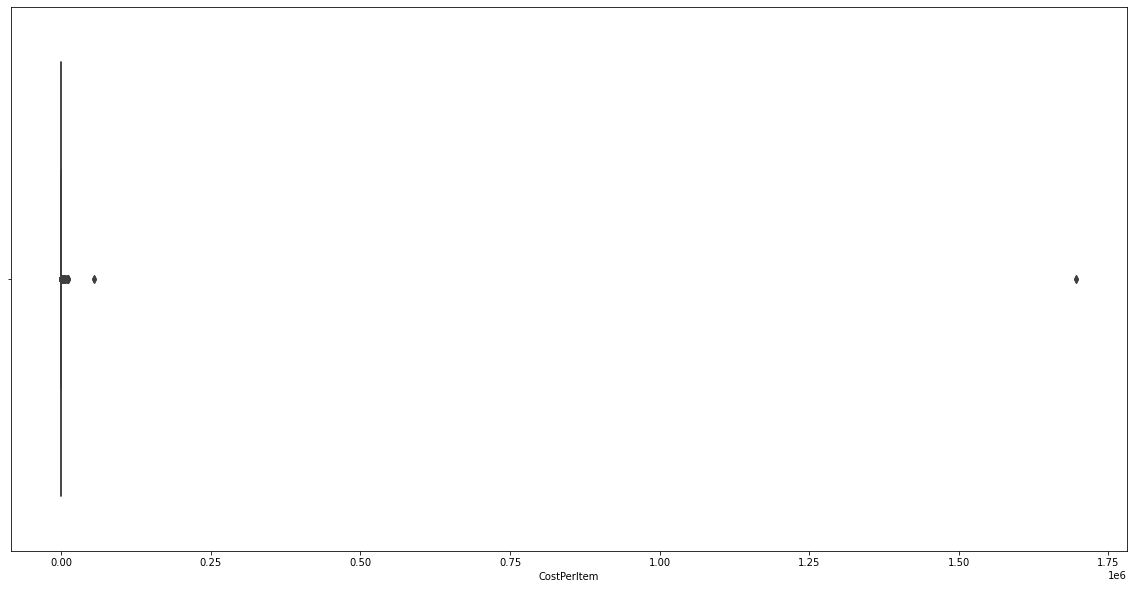

In [200]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df2, x='CostPerItem')

In [201]:
df2.shape

(760294, 10)

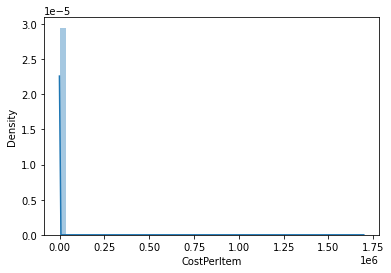

In [202]:
#checking the outlier
sns.distplot(df2['CostPerItem'])

In [203]:
# get IQR for CostPerItem
Q1 = df2['CostPerItem'].quantile(0.25)
Q3 = df2['CostPerItem'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 1.73

Q3:
 5.18

IQR:
 3.4499999999999997

Min:
 -3.445

Max:
 10.355


In [204]:
df2 = df2[(df2["CostPerItem"] >= boxplot_min)&(df2["CostPerItem"] <= boxplot_max)]

In [205]:
df2.shape

(688786, 10)


# **EXPLORING DATA**

In [206]:
df2.head()

,UserId,TransactionId,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Time,TransactionTime2,TransactionTime2Month
1,337701,6283376,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,09:06:00,2018-12-26,2018-12
2,267099,6385599,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,09:45:00,2019-02-15,2019-02
3,380478,6044973,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,07:14:00,2018-06-22,2018-06
5,285957,6307136,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,Fri,09:50:00,2019-01-11,2019-01
6,345954,6162981,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom,Fri,10:51:00,2018-09-28,2018-09


### **COUNTRY WITH THE MOST SALES**

In [207]:
df2['TotalSales'] = df2['NumberOfItemsPurchased']*df2['CostPerItem']

### **Product Sold Every Month**

In [208]:
TopCountry = df2.groupby('Country')[['TotalSales']].sum().sort_values('TotalSales', ascending=False).head(10)
TopCountry.reset_index(inplace=True)
TopCountry

,Country,TotalSales
0,United Kingdom,3.035998e+07
1,Germany,1.126588e+06
2,France,1.005318e+06
3,EIRE,8.642146e+05
4,Spain,2.459551e+05
5,Switzerland,2.458900e+05
6,Belgium,2.294548e+05
7,Portugal,1.686310e+05
8,Norway,1.489749e+05
9,Netherlands,1.290653e+05


Text(0, 0.5, 'Country')

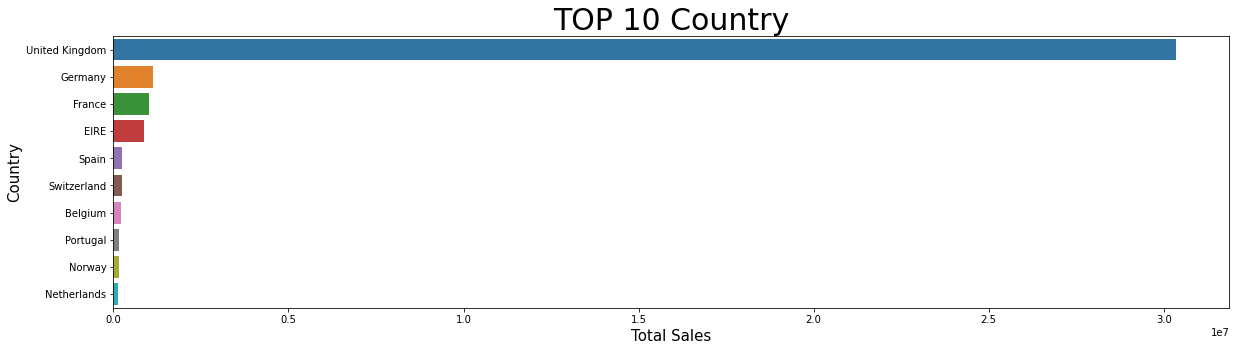

In [209]:
plt.figure(figsize=(20,5))
sns.barplot(data=TopCountry, x='TotalSales', y='Country')
plt.title("TOP 10 Country", fontsize=30)
plt.xlabel("Total Sales", fontsize=15)
plt.ylabel("Country", fontsize=15)

In [210]:

monthlysold = df2.groupby('TransactionTime2Month')[['NumberOfItemsPurchased']].sum()
monthlysold = pd.DataFrame(monthlysold)
monthlysold = monthlysold.reset_index()
monthlysold.head()

,TransactionTime2Month,NumberOfItemsPurchased
0,2018-02,810432
1,2018-03,507648
2,2018-04,776610
3,2018-05,924552
4,2018-06,1056132


Text(0, 0.5, 'Number of Product Sold')

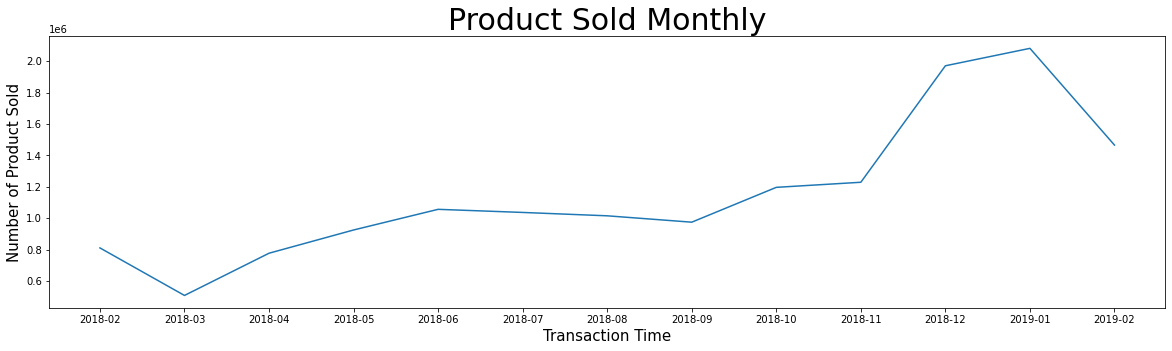

In [211]:
plt.figure(figsize=(20,5))
sns.lineplot(data=monthlysold, x='TransactionTime2Month', y='NumberOfItemsPurchased')
plt.title("Product Sold Monthly", fontsize=30)
plt.xlabel("Transaction Time", fontsize=15)
plt.ylabel("Number of Product Sold", fontsize=15)

In [212]:
monthlysales = df2.groupby('TransactionTime2Month')[['TotalSales']].sum()
monthlysales.head()

,TotalSales
TransactionTime2Month,
2018-02,2121186.66
2018-03,1188012.24
2018-04,1904837.46
2018-05,2165641.26
2018-06,2384311.68


Text(0, 0.5, 'Total Sales')

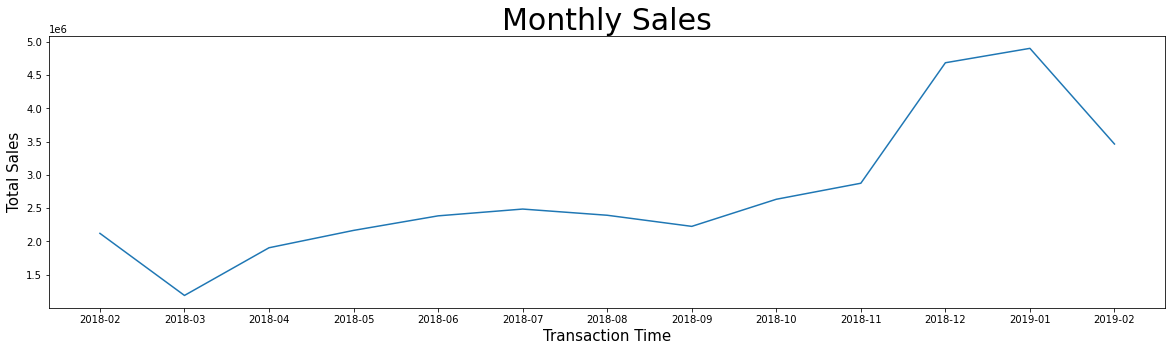

In [213]:
plt.figure(figsize=(20,5))
sns.lineplot(data=monthlysales, x='TransactionTime2Month', y='TotalSales')
plt.title("Monthly Sales", fontsize=30)
plt.xlabel("Transaction Time", fontsize=15)
plt.ylabel("Total Sales", fontsize=15)

In [214]:
mostproduct = df2.groupby('ItemDescription')[['NumberOfItemsPurchased']].sum().sort_values('NumberOfItemsPurchased', ascending=False).head(10)
mostproduct.reset_index(inplace=True)
mostproduct

,ItemDescription,NumberOfItemsPurchased
0,PACK OF 72 RETROSPOT CAKE CASES,89964
1,ASSORTED COLOUR BIRD ORNAMENT,81846
2,JUMBO BAG RED RETROSPOT,72318
3,WHITE HANGING HEART T-LIGHT HOLDER,64182
4,LUNCH BAG RED RETROSPOT,58170
5,JAM MAKING SET PRINTED,51762
6,PACK OF 60 PINK PAISLEY CAKE CASES,51162
7,60 TEATIME FAIRY CAKE CASES,50376
8,VICTORIAN GLASS HANGING T-LIGHT,45228
9,RED RETROSPOT WRAP,44832


Text(0, 0.5, 'Product')

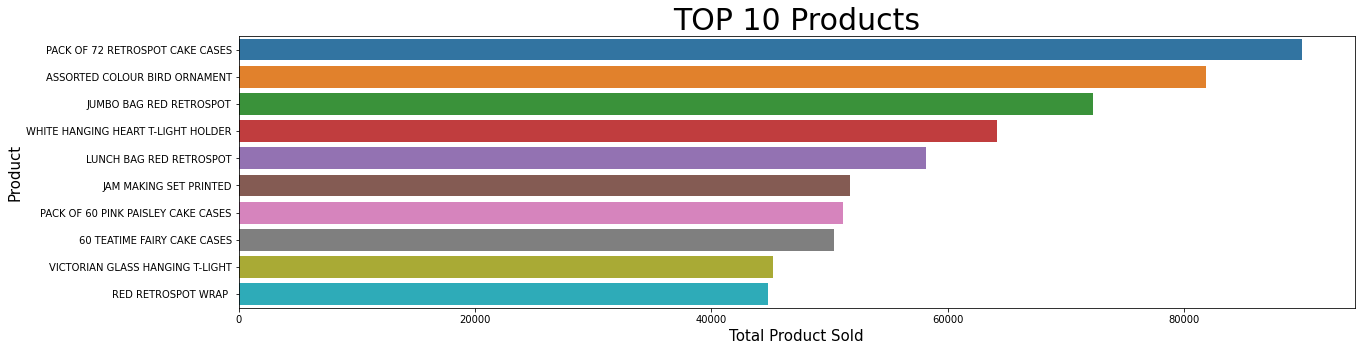

In [215]:
plt.figure(figsize=(20,5))
sns.barplot(data=mostproduct, x='NumberOfItemsPurchased', y='ItemDescription')
plt.title("TOP 10 Products", fontsize=30)
plt.xlabel("Total Product Sold", fontsize=15)
plt.ylabel("Product", fontsize=15)

# **RFM**

In [216]:
rfmtable = pd.DataFrame(df2['UserId'].unique())
rfmtable.columns = ['UserId']
rfmtable.head()

,UserId
0,337701
1,267099
2,380478
3,285957
4,345954


In [217]:
lastestorder = df2.groupby('UserId').TransactionTime2.max().reset_index()
lastestorder.columns = ['UserId','LatestOrderDate']
lastestorder.head()

,UserId,LatestOrderDate
0,259287,2019-02-18
1,259308,2018-06-17
2,259329,2019-02-02
3,259350,2018-04-16
4,259392,2019-01-15


In [218]:
# Calculate Recency
# Recency = point in time of observation - number of days last purchase
lastestorder['Recency'] = (lastestorder['LatestOrderDate'].max() - lastestorder['LatestOrderDate']).dt.days
lastestorder.head()

,UserId,LatestOrderDate,Recency
0,259287,2019-02-18,2
1,259308,2018-06-17,248
2,259329,2019-02-02,18
3,259350,2018-04-16,310
4,259392,2019-01-15,36


In [219]:
rfmtable = pd.merge(rfmtable, lastestorder[['UserId', 'Recency']], on='UserId')
rfmtable.head()

,UserId,Recency
0,337701,56
1,267099,5
2,380478,10
3,285957,40
4,345954,7


Text(0.5, 1.0, 'Recency Distribution Value')

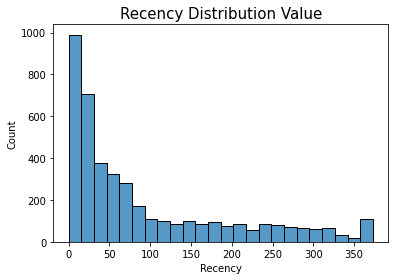

In [220]:

sns.histplot(rfmtable['Recency'])
plt.title('Recency Distribution Value', fontsize=15)

### **Frequency**

In [221]:
#Frequency

freq = df2.groupby('UserId').TransactionTime2.count().reset_index()
freq.columns = ['UserId','Frequency']
freq.head()

,UserId,Frequency
0,259287,332
1,259308,12
2,259329,116
3,259350,32
4,259392,146


In [222]:
rfmtable = pd.merge(rfmtable, freq, on='UserId')
rfmtable.head()

,UserId,Recency,Frequency
0,337701,56,418
1,267099,5,74
2,380478,10,2430
3,285957,40,80
4,345954,7,712


Text(0.5, 1.0, 'Frequency Distribution Value')

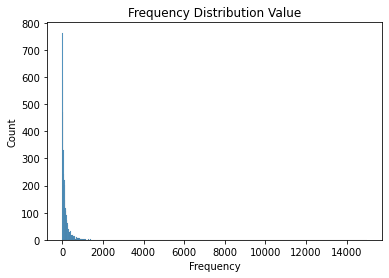

In [223]:
sns.histplot(rfmtable['Frequency'])
plt.title('Frequency Distribution Value')

### **Monetary**

In [224]:
monetary = df2.groupby('UserId').TotalSales.sum().reset_index()
monetary.columns = ['UserId','Monetary']
monetary.head()

,UserId,Monetary
0,259287,27499.92
1,259308,749.28
2,259329,8288.94
3,259350,2443.20
4,259392,8383.80


In [225]:
rfmtable = pd.merge(rfmtable, monetary, on='UserId')
rfmtable.head()

,UserId,Recency,Frequency,Monetary
0,337701,56,418,19331.16
1,267099,5,74,3831.72
2,380478,10,2430,38764.14
3,285957,40,80,3683.58
4,345954,7,712,13958.88


Text(0.5, 1.0, 'Monetary Distribution Value')

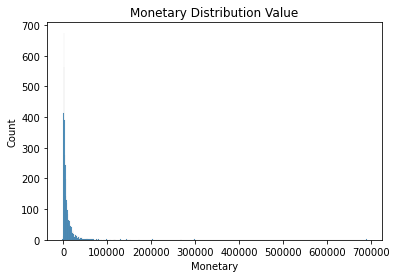

In [226]:
sns.histplot(rfmtable['Monetary'])
plt.title('Monetary Distribution Value')

### **RFM SCORE**

In [227]:
quartile = rfmtable.quantile(q=[0.25,0.5,0.75])
quartile

,UserId,Recency,Frequency,Monetary
0.25,289994.25,17.0,30.0,1667.670
0.50,321058.50,50.0,72.0,3817.110
0.75,352222.50,143.0,178.0,9217.785


In [228]:
rfmsegmented = rfmtable.copy()

In [229]:
def scorerecency (data):
    if data <= 17:
        return 4
    elif data <= 50:
        return 3
    elif data <= 143:
        return 2
    else:
        return 1

def scorefreq (data):
    if data <= 30:
        return 1
    elif data <= 72:
        return 2
    elif data <= 178:
        return 3
    else:
        return 4
def monetaryscore (data):
    if data <= 1667.670:
        return 1
    elif data <= 3817.110:
        return 2
    elif data <= 9217.785:
        return 3
    else:
        return 4

rfmsegmented['R'] = rfmsegmented['Recency'].apply(scorerecency )
rfmsegmented['F'] = rfmsegmented['Frequency'].apply(scorefreq)
rfmsegmented['M'] = rfmsegmented['Monetary'].apply(monetaryscore)
rfmsegmented.head()

,UserId,Recency,Frequency,Monetary,R,F,M
0,337701,56,418,19331.16,2,4,4
1,267099,5,74,3831.72,4,3,3
2,380478,10,2430,38764.14,4,4,4
3,285957,40,80,3683.58,3,3,2
4,345954,7,712,13958.88,4,4,4


*   Best Recency score = 4 (purchased very recently)
*   Best Frequency score = 4 (highest quantity purchases)
*   Best Monetary score = 4 (spent the most)




### **TOTAL RFM SCORE**

In [230]:
rfmsegmented['RFMScore'] = rfmsegmented[['R','F','M']].sum(axis=1)
rfmsegmented.head()

,UserId,Recency,Frequency,Monetary,R,F,M,RFMScore
0,337701,56,418,19331.16,2,4,4,10
1,267099,5,74,3831.72,4,3,3,10
2,380478,10,2430,38764.14,4,4,4,12
3,285957,40,80,3683.58,3,3,2,8
4,345954,7,712,13958.88,4,4,4,12


In [231]:
rfmsegmented['RFMSegment'] = rfmsegmented.R.map(str)+rfmsegmented.F.map(str)+rfmsegmented.M.map(str)
rfmsegmented.head()

,UserId,Recency,Frequency,Monetary,R,F,M,RFMScore,RFMSegment
0,337701,56,418,19331.16,2,4,4,10,244
1,267099,5,74,3831.72,4,3,3,10,433
2,380478,10,2430,38764.14,4,4,4,12,444
3,285957,40,80,3683.58,3,3,2,8,332
4,345954,7,712,13958.88,4,4,4,12,444


In [232]:
rfmsegmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222 entries, 0 to 4221
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UserId      4222 non-null   int64  
 1   Recency     4222 non-null   int64  
 2   Frequency   4222 non-null   int64  
 3   Monetary    4222 non-null   float64
 4   R           4222 non-null   int64  
 5   F           4222 non-null   int64  
 6   M           4222 non-null   int64  
 7   RFMScore    4222 non-null   int64  
 8   RFMSegment  4222 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 329.8+ KB


In [233]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][2-3]': 'At risk',
    r'[1-2]4': 'Can\'t loose them',
    r'2[1-2]': 'About to sleep',
    r'22': 'Need attention',
    r'[2-3][3-4]': 'Loyal customers',
    r'31': 'Promising',
    r'41': 'New customers',
    r'[3-4][1-2]': 'Potential loyalists',
    r'4[3-4]': 'Champions'
}

rfmsegmented['Segment'] = rfmsegmented['R'].map(str) + rfmsegmented['F'].map(str)
rfmsegmented['Segment'] = rfmsegmented['Segment'].replace(segt_map, regex=True)

In [234]:
rfmsegmented.head(10)

,UserId,Recency,Frequency,Monetary,R,F,M,RFMScore,RFMSegment,Segment
0,337701,56,418,19331.16,2,4,4,10,244,Can't loose them
1,267099,5,74,3831.72,4,3,3,10,433,Champions
2,380478,10,2430,38764.14,4,4,4,12,444,Champions
3,285957,40,80,3683.58,3,3,2,8,332,Loyal customers
4,345954,7,712,13958.88,4,4,4,12,444,Champions
5,339822,72,8,603.84,2,1,1,4,211,Hibernating
6,328440,4,834,66400.50,4,4,4,12,444,Champions
7,316848,21,94,6813.30,3,3,3,9,333,Loyal customers
8,372897,1,1356,35633.28,4,4,4,12,444,Champions
9,364791,17,152,1746.84,4,3,2,9,432,Champions


In [236]:
segmentation = rfmsegmented.groupby('Segment')[['RFMSegment']].count().sort_values('RFMSegment', ascending=False)
segmentation.reset_index(inplace=True)
segmentation

,Segment,RFMSegment
0,Hibernating,1435
1,Champions,841
2,Loyal customers,612
3,At risk,435
4,Potential loyalists,386
5,Can't loose them,206
6,Promising,186
7,New customers,121


In [238]:
fig = px.pie(segmentation,'Segment','RFMSegment', title="Customer Segmentation Distribution")
fig.update_traces(textposition='inside', textinfo='percent+label')

In [239]:
# Calculate average values for each RFM segment, and return a size of each segment 
MetricAnalysis = rfmsegmented.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
}).round(1)
# Print the aggregated dataset
MetricAnalysis

Recency Frequency Monetary      
                       mean      mean     mean count
Segment                                             
At risk               138.7     112.4   5761.9   435
Can't loose them      109.0     287.0  12959.8   206
Champions               7.2     426.5  21545.5   841
Hibernating           183.5      29.9   2042.4  1435
Loyal customers        30.5     251.5  12007.2   612
New customers           8.7      17.4   1549.0   121
Potential loyalists    23.2      51.8   3613.5   386
Promising              33.2      16.8   1462.6   186

In [240]:
rfmsegmented2 = rfmsegmented

# **Calculate CLTV  formula:**
*   CLV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
*   CLTV = Average Order Value * Purchase Frequency



In [ ]:
rfmsegmented2.head(5)

,UserId,Recency,Frequency,Monetary,R,F,M,RFMScore,RFMSegment,Segment
0,337701,56,418,19331.16,2,4,4,10,244,Can't loose them
1,267099,5,74,3831.72,4,3,3,10,433,Champions
2,380478,10,2430,38764.14,4,4,4,12,444,Champions
3,285957,40,80,3683.58,3,3,2,8,332,Loyal customers
4,345954,7,712,13958.88,4,4,4,12,444,Champions


In [ ]:
rfmsegmented2['AvgOrderValue'] = rfmsegmented2['Monetary']/rfmsegmented2['Frequency']
rfmsegmented2.head()

,UserId,Recency,Frequency,Monetary,R,F,M,RFMScore,RFMSegment,Segment,AvgOrderValue
0,337701,56,418,19331.16,2,4,4,10,244,Can't loose them,46.246794
1,267099,5,74,3831.72,4,3,3,10,433,Champions,51.780000
2,380478,10,2430,38764.14,4,4,4,12,444,Champions,15.952321
3,285957,40,80,3683.58,3,3,2,8,332,Loyal customers,46.044750
4,345954,7,712,13958.88,4,4,4,12,444,Champions,19.605169


In [ ]:
rfmsegmented2.Frequency.min()

2

In [ ]:
rfmsegmented2.shape[0]

4222

In [ ]:
rfmsegmented2[rfmsegmented2.Frequency > 2].shape[0]

4148

## Calculate Purchase Frequency

In [ ]:
PurchaseFrequency=sum(rfmsegmented2['Frequency'])/rfmsegmented2.shape[0]

## Calculate Repeat Rate and Churn Rate

In [ ]:
# Repeat Rate
RepeatRate=rfmsegmented2[rfmsegmented2.Frequency > 2].shape[0]/rfmsegmented2.shape[0]

#Churn Rate
ChurnRate=1-RepeatRate
PurchaseFrequency,RepeatRate,ChurnRate

(163.14211274277594, 0.9824727617243013, 0.017527238275698687)

## Calculate Profit Margin
Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.

In [ ]:
rfmsegmented2['Profit']= rfmsegmented2['Monetary']*0.05
rfmsegmented2.head(5)

,UserId,Recency,Frequency,Monetary,R,F,M,RFMScore,RFMSegment,Segment,AvgOrderValue,Profit
0,337701,56,418,19331.16,2,4,4,10,244,Can't loose them,46.246794,966.558
1,267099,5,74,3831.72,4,3,3,10,433,Champions,51.780000,191.586
2,380478,10,2430,38764.14,4,4,4,12,444,Champions,15.952321,1938.207
3,285957,40,80,3683.58,3,3,2,8,332,Loyal customers,46.044750,184.179
4,345954,7,712,13958.88,4,4,4,12,444,Champions,19.605169,697.944


In [ ]:
FirstProfit = rfmsegmented2['Monetary'].sum()
FirstProfit

35429409.24000002

In [ ]:
FinalProfit = (rfmsegmented2['Monetary']+rfmsegmented2['Profit']).sum()
FinalProfit

37200879.70200002

## Calculate Customer Lifetime Value

In [ ]:
rfmsegmented2['CLV'] = ((rfmsegmented2['AvgOrderValue']*PurchaseFrequency)/ChurnRate)*rfmsegmented2['Profit']
rfmsegmented2.head(5)

,UserId,Recency,Frequency,Monetary,R,F,M,RFMScore,RFMSegment,Segment,AvgOrderValue,Profit,CLV
0,337701,56,418,19331.16,2,4,4,10,244,Can't loose them,46.246794,966.558,4.160659e+08
1,267099,5,74,3831.72,4,3,3,10,433,Champions,51.780000,191.586,9.233756e+07
2,380478,10,2430,38764.14,4,4,4,12,444,Champions,15.952321,1938.207,2.877906e+08
3,285957,40,80,3683.58,3,3,2,8,332,Loyal customers,46.044750,184.179,7.893558e+07
4,345954,7,712,13958.88,4,4,4,12,444,Champions,19.605169,697.944,1.273631e+08


# **CLTV Model Definition**
For the CLTV models, the following nomenclature is used:
- Recency : How recently customer did the transaction
- Frequency : How often the customer make the transaction
- T : Age of the customer (LastTransaction - FirstTransaction)

In [ ]:
df3.dtypes

UserId                       int64
TransactionTime2    datetime64[ns]
TotalSales                 float64
dtype: object

In [ ]:
df3.head()

,UserId,TransactionTime2,TotalSales
1,337701,2018-12-26,10.56
2,267099,2019-02-15,64.80
3,380478,2018-06-22,5.19
5,285957,2019-01-11,42.24
6,345954,2018-09-28,61.56


In [ ]:
df3 = df3[pd.notnull(df3['UserId'])]
cols_of_interest = ['UserId', 'TransactionTime2', 'TotalSales']
df3 = df3[cols_of_interest]
print(df3.head())
print(df3['UserId'].nunique())

   UserId TransactionTime2  TotalSales
1  337701       2018-12-26       10.56
2  267099       2019-02-15       64.80
3  380478       2018-06-22        5.19
5  285957       2019-01-11       42.24
6  345954       2018-09-28       61.56
4222


In [ ]:
df3.head()

,UserId,TransactionTime2,TotalSales
1,337701,2018-12-26,10.56
2,267099,2019-02-15,64.80
3,380478,2018-06-22,5.19
5,285957,2019-01-11,42.24
6,345954,2018-09-28,61.56


In [ ]:
df4 = summary_data_from_transaction_data(df3, 'UserId', 'TransactionTime2', 'TotalSales', observation_period_end='2019-02-21')
df4.head()

,frequency,recency,T,monetary_value
UserId,,,,
259287,6.0,365.0,368.0,3683.78
259308,2.0,110.0,359.0,155.76
259329,0.0,0.0,19.0,0.00
259350,0.0,0.0,311.0,0.00
259392,6.0,260.0,297.0,1081.48


There are 4222 customers in this analysis.
UserId 259350 made 1 purchase only, so the frequency and recency are 0, and the age is 311 days

count    4222.000000
mean        3.139270
std         6.198717
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       143.000000
Name: frequency, dtype: float64
0.0020383689563957456


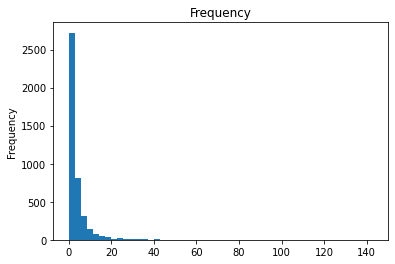

In [ ]:
df4['frequency'].plot(kind='hist', bins=50)
plt.title('Frequency')
print(df4['frequency'].describe())
print(sum(df4['frequency'] == 0)/float(len(df3)))

From this graph, we can see that the frequency of purchase were in between 0  to 20.

count    4222.000000
mean      130.998342
std       132.402700
min         0.000000
25%         0.000000
50%        92.000000
75%       252.000000
max       373.000000
Name: recency, dtype: float64
0.0020383689563957456


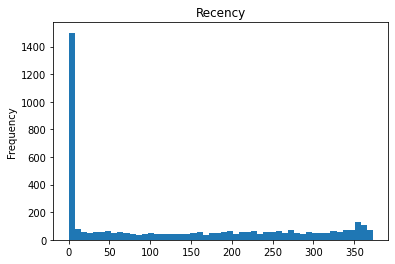

In [ ]:
df4['recency'].plot(kind='hist', bins=50)
plt.title('Recency')
print(df4['recency'].describe())
print(sum(df4['recency'] == 0)/float(len(df3)))

more than 35% of the customer only made purchase once.
# **Frequency/Recency Analysis Using the BG/NBD Model**

In [ ]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(df4['frequency'], df4['recency'], df4['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4222 subjects, a: 0.01, alpha: 62.21, b: 0.27, r: 0.85>


<lifetimes.BetaGeoFitter: fitted with 4222 subjects, a: 0.01, alpha: 62.21, b: 0.27, r: 0.85>


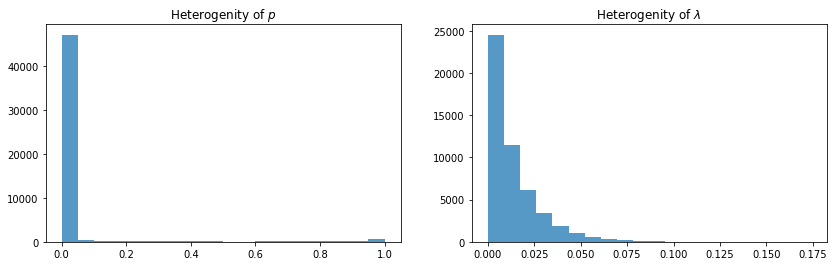

In [ ]:
from scipy.stats import gamma, beta
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(df4['frequency'], df4['recency'], df4['T'], )
print (bgf)
#  
# Plot
gbd = beta.rvs(bgf.params_['a'], bgf.params_['b'], size = 50000)
ggd = gamma.rvs(bgf.params_['r'], scale=1./bgf.params_['alpha'], size = 50000)
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Heterogenity of $p$')
temp = plt.hist(gbd, 20,  alpha=0.75)
plt.subplot(122) 
plt.title('Heterogenity of $\lambda$')
temp = plt.hist(ggd, 20,  alpha=0.75)

### Visualizing our frequency/recency matrix


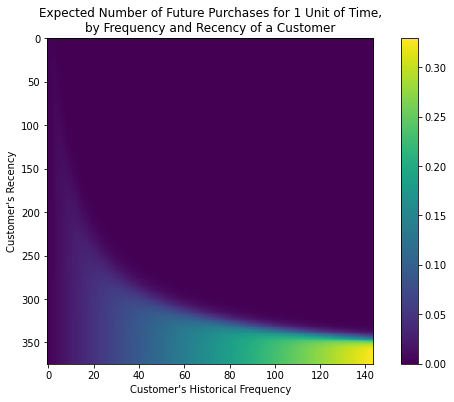

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(bgf)
plt.show()

from this we can see when a customer has made 140 purchases, and their latest purchase was they were approximately 350 days old (Recency: 350 days), then they are our best customer (bottom-right).

Customers who have purchased a lot and purchased recently will likely be the best customers in the future.

Customers who have purchased a lot but not recently (top-right corner), have probably gone.

Another interesting matrix to look at is the probability of still being alive:


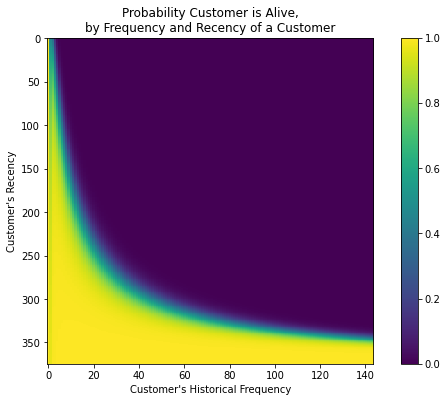

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(10,6))
plot_probability_alive_matrix(bgf)
plt.show()

Customers who have purchased recently are probably “alive”.

### Customer transactions predictions
Models will predict a customer’s expected purchases in the next period based on their history


In [ ]:
t = 10
df4['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, df4['frequency'], df4['recency'], df4['T'])
df4.sort_values(by='predicted_purchases').tail(10)

,frequency,recency,T,monetary_value,predicted_purchases
UserId,,,,,
318969,42.0,331.0,333.0,977.914286,1.083883
281568,48.0,372.0,374.0,1554.508750,1.119551
305067,53.0,367.0,370.0,651.113208,1.245536
272391,64.0,369.0,373.0,690.412500,1.489592
274869,73.0,364.0,369.0,3952.419452,1.711975
306726,87.0,372.0,374.0,751.895172,2.013458
321531,89.0,373.0,374.0,1577.221348,2.059362
267708,110.0,373.0,374.0,1575.798545,2.540711
374661,112.0,372.0,374.0,2357.964643,2.586469


from the table above we can see top 10 customer that expected to make purchases in the next 10 days

The predicted_purcahses columns is represent the expected number of purchases that customer will make in the future. The BG/NBD  model believes that the customer will make more purchases in the future since they are our best customer.

In [ ]:
t = 10 #predict purchases in 10 periods 
individual = df4.loc[318969]
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_, to_time` 
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

1.0838826675640107

Our model predicts that customer 318969's future transaction is 1.083 in 10 days.

## the probability of customer being alive

In [ ]:
t = 1
df4['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, df4['frequency'], df4['recency'], df4['T'])
best_projected_cust = df4.sort_values('predicted_purchases').tail(6)
df4.sort_values(by='predicted_purchases').tail(6)

,frequency,recency,T,monetary_value,predicted_purchases
UserId,,,,,
274869,73.0,364.0,369.0,3952.419452,0.171215
306726,87.0,372.0,374.0,751.895172,0.201366
321531,89.0,373.0,374.0,1577.221348,0.205957
267708,110.0,373.0,374.0,1575.798545,0.254096
374661,112.0,372.0,374.0,2357.964643,0.258672
313131,143.0,372.0,374.0,4818.553846,0.329732


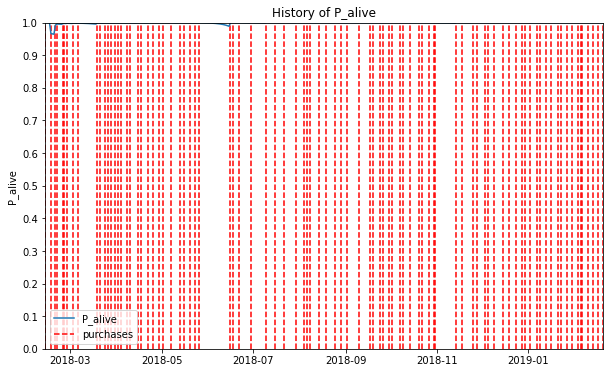

In [ ]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
id = 321531
days_since_birth = 365
sp_trans = df2.loc[df2['UserId'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'TransactionTime2')
plt.show()

From this plot we can see that our customer with UserId 321531 is being dead